In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from IPython.display import clear_output
from time import sleep
from pylab import rcParams

%matplotlib inline
%load_ext autoreload
%autoreload 2

rcParams['figure.figsize'] = 10, 20

In [2]:
from model.linear_observer_planter import LinearPlanterObserver
from env.env_naive_torus import NaiveSandbox
from loss.losses import sum_loss_l1

In [3]:
grid_size=(100,100)
agent_window_size = 10 

In [4]:
sandbox = NaiveSandbox(grid_size=grid_size)
agent = LinearPlanterObserver(grid_size=grid_size, window_size=agent_window_size)
optim = torch.optim.Adam(agent.parameters())

In [5]:
iterations = 10
steps_after_action = 10

In [6]:
list_loss = []
# dummy reward_f
def reward_f(x): return 0.

field after agent inference


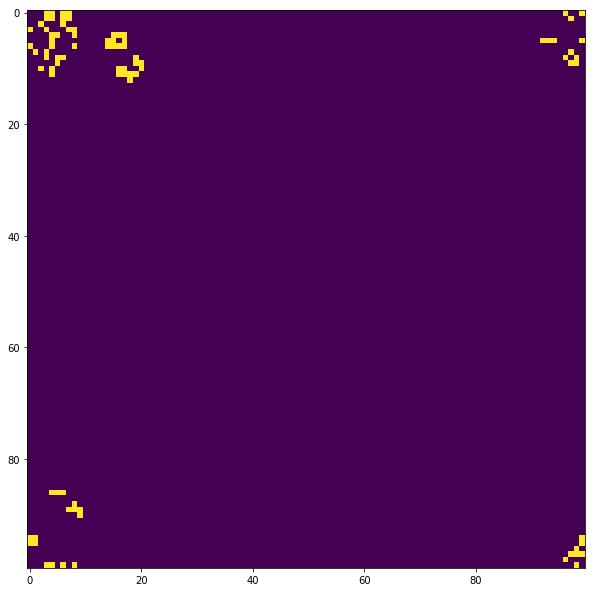

9 tensor(9949.)


In [7]:
for i in range(iterations):
    memoized_env, perception_field, x0, y0 = agent.forward(torch.tensor(sandbox.get_grid()).float())
#     print(perception_field)
#     plt.imshow(perception_field.detach().numpy())
#     plt.show()
    
    env_state = sandbox.forward(inserted_block=perception_field.detach(), 
                                inserted_block_position_x0=x0, 
                                inserted_block_position_y0=y0, 
                                n_steps=steps_after_action,
                                reward_fn=reward_f 
                               )
    clear_output(wait=True)
    print('field after agent inference')
    plt.imshow(env_state['grid'])
    plt.show()

    l = sum_loss_l1(memoized_env)
    list_loss.append(l.data)
    print(i, l.data)
    
    l.backward()
        
    optim.step()
    optim.zero_grad()